<a href="https://colab.research.google.com/github/jjoseph2008/INSE6220/blob/main/SampleProject_facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## **Upload File**

In [22]:
#from google.colab import files
#uploaded = files.upload()

In [23]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jjoseph2008/INSE6220/main/dataset_Facebook_edit_nan.csv')
df.head(n=10)

,Page total likes,Type,Lifetime Post Total Reach,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,comment,like,share,Total Interactions
0,139441,Photo,2752,178,109,159,4,79,17,100
1,139441,Status,10460,1457,1361,1674,5,130,29,164
2,139441,Photo,2413,177,113,154,0,66,14,80
3,139441,Photo,50128,2211,790,1119,58,1572,147,1777
4,139441,Photo,7244,671,410,580,19,325,49,393
5,139441,Status,10472,1191,1073,1389,1,152,33,186
6,139441,Photo,11692,481,265,364,3,249,27,279
7,139441,Photo,13720,537,232,305,0,325,14,339
8,139441,Status,11844,1530,1407,1692,0,161,31,192
9,139441,Photo,4694,280,183,250,3,113,26,142


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Page total likes            496 non-null    int64 
 1   Type                        496 non-null    object
 2   Lifetime Post Total Reach   496 non-null    int64 
 3   Lifetime Engaged Users      496 non-null    int64 
 4   Lifetime Post Consumers     496 non-null    int64 
 5   Lifetime Post Consumptions  496 non-null    int64 
 6   comment                     496 non-null    int64 
 7   like                        496 non-null    int64 
 8   share                       496 non-null    int64 
 9   Total Interactions          496 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 38.9+ KB


In [25]:
df.columns

Index(['Page total likes', 'Type', 'Lifetime Post Total Reach',
       'Lifetime Engaged Users', 'Lifetime Post Consumers',
       'Lifetime Post Consumptions', 'comment', 'like', 'share',
       'Total Interactions'],
      dtype='object')

In [26]:
#df.dropna()
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum() )
#df1 = df[df.isna().any(axis=1)]
#df1.head()

Number of rows with NaNs is:  0


### **Classes**

In [27]:
Y = df['Type']
Y.head()

0     Photo
1    Status
2     Photo
3     Photo
4     Photo
Name: Type, dtype: object

### **Features**

In [28]:
# Visualize features with proper names
df = df[['Page total likes', 'Lifetime Post Total Reach',
       'Lifetime Engaged Users', 'Lifetime Post Consumers',
       'Lifetime Post Consumptions', 'comment', 'like', 'share',
       'Total Interactions']]
df.head(10)

,Page total likes,Lifetime Post Total Reach,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,comment,like,share,Total Interactions
0,139441,2752,178,109,159,4,79,17,100
1,139441,10460,1457,1361,1674,5,130,29,164
2,139441,2413,177,113,154,0,66,14,80
3,139441,50128,2211,790,1119,58,1572,147,1777
4,139441,7244,671,410,580,19,325,49,393
5,139441,10472,1191,1073,1389,1,152,33,186
6,139441,11692,481,265,364,3,249,27,279
7,139441,13720,537,232,305,0,325,14,339
8,139441,11844,1530,1407,1692,0,161,31,192
9,139441,4694,280,183,250,3,113,26,142


In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Page total likes,496.0,123088.987903,16295.904371,81370.0,111620.00,129600.0,136393.00,139441.0
Lifetime Post Total Reach,496.0,14008.262097,22802.267837,238.0,3331.50,5290.0,13232.00,180480.0
Lifetime Engaged Users,496.0,926.098790,986.849557,9.0,399.00,628.0,1062.00,11452.0
Lifetime Post Consumers,496.0,803.590726,884.379330,9.0,335.00,555.0,966.00,11328.0
Lifetime Post Consumptions,496.0,1424.544355,2005.868889,9.0,512.75,859.0,1474.00,19779.0
comment,496.0,7.542339,21.255593,0.0,1.00,3.0,7.00,372.0
like,496.0,178.967742,324.108473,0.0,57.00,101.0,188.00,5172.0
share,496.0,27.266129,42.613292,0.0,10.00,19.0,32.25,790.0
Total Interactions,496.0,213.776210,381.315565,0.0,72.00,125.0,230.50,6334.0


Notice that the data is not standardizd.

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Scale features
minmax = MinMaxScaler(feature_range = (0, 1))
df[['Page total likes', 'Lifetime Post Total Reach',
       'Lifetime Engaged Users', 'Lifetime Post Consumers',
       'Lifetime Post Consumptions', 'comment', 'like', 'share',
       'Total Interactions']] = minmax.fit_transform(df[['Page total likes', 'Lifetime Post Total Reach',
       'Lifetime Engaged Users', 'Lifetime Post Consumers',
       'Lifetime Post Consumptions', 'comment', 'like', 'share',
       'Total Interactions']])
df[['Page total likes', 'Lifetime Post Total Reach',
       'Lifetime Engaged Users', 'Lifetime Post Consumers',
       'Lifetime Post Consumptions', 'comment', 'like', 'share',
       'Total Interactions']].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Page total likes,Lifetime Post Total Reach,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,comment,like,share,Total Interactions
0,1.0,0.013948,0.014769,0.008835,0.007587,0.010753,0.015275,0.021519,0.015788
1,1.0,0.056713,0.126540,0.119445,0.084219,0.013441,0.025135,0.036709,0.025892
2,1.0,0.012067,0.014681,0.009188,0.007334,0.000000,0.012761,0.017722,0.012630
3,1.0,0.276795,0.192432,0.068999,0.056146,0.155914,0.303944,0.186076,0.280549
4,1.0,0.038870,0.057852,0.035427,0.028882,0.051075,0.062838,0.062025,0.062046


In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Page total likes,496.0,0.718413,0.280620,0.0,0.520914,0.830535,0.947513,1.0
Lifetime Post Total Reach,496.0,0.076399,0.126509,0.0,0.017163,0.028029,0.072092,1.0
Lifetime Engaged Users,496.0,0.080145,0.086240,0.0,0.034082,0.054094,0.092021,1.0
Lifetime Post Consumers,496.0,0.070200,0.078132,0.0,0.028801,0.048237,0.084548,1.0
Lifetime Post Consumptions,496.0,0.071601,0.101460,0.0,0.025481,0.042994,0.074102,1.0
comment,496.0,0.020275,0.057139,0.0,0.002688,0.008065,0.018817,1.0
like,496.0,0.034603,0.062666,0.0,0.011021,0.019528,0.036350,1.0
share,496.0,0.034514,0.053941,0.0,0.012658,0.024051,0.040823,1.0
Total Interactions,496.0,0.033751,0.060201,0.0,0.011367,0.019735,0.036391,1.0


Notice that the data is now standardizd.

**Observations and variables**

In [32]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

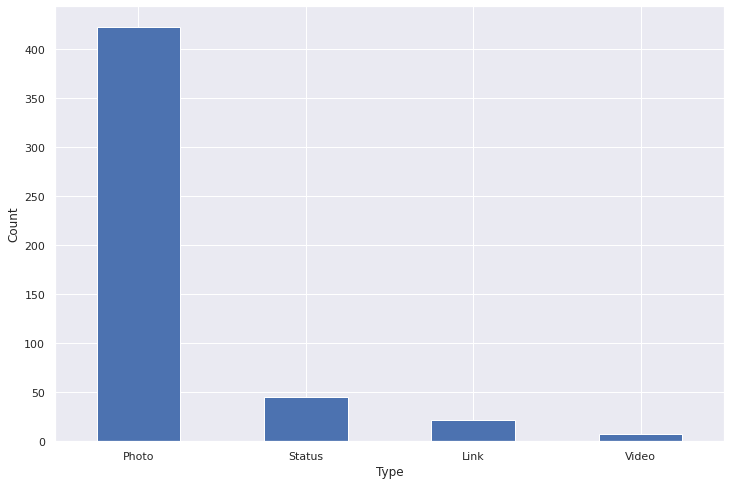

In [33]:
Y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

[Text(0, 0, 'Page total likes'),
 Text(0, 0, 'Lifetime Post Total Reach'),
 Text(0, 0, 'Lifetime Engaged Users'),
 Text(0, 0, 'Lifetime Post Consumers'),
 Text(0, 0, 'Lifetime Post Consumptions'),
 Text(0, 0, 'comment'),
 Text(0, 0, 'like'),
 Text(0, 0, 'share'),
 Text(0, 0, 'Total Interactions')]

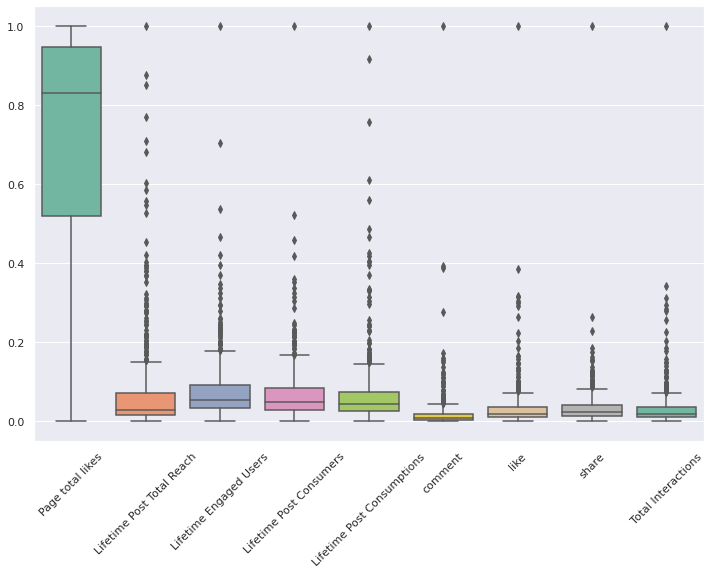

In [34]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'Page total likes'),
 Text(0, 0, 'Lifetime Post Total Reach'),
 Text(0, 0, 'Lifetime Engaged Users'),
 Text(0, 0, 'Lifetime Post Consumers'),
 Text(0, 0, 'Lifetime Post Consumptions'),
 Text(0, 0, 'comment'),
 Text(0, 0, 'like'),
 Text(0, 0, 'share'),
 Text(0, 0, 'Total Interactions')]

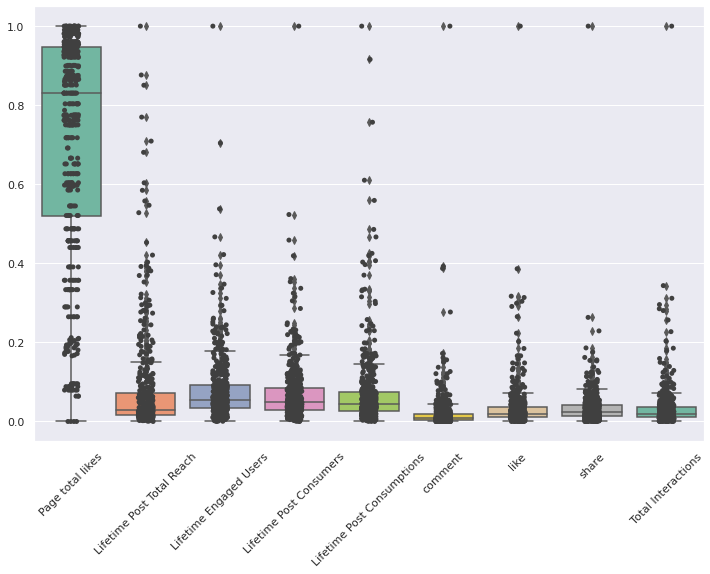

In [35]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### Five Number Summary

In [36]:
df.describe()

,Page total likes,Lifetime Post Total Reach,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,comment,like,share,Total Interactions
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,0.718413,0.076399,0.080145,0.070200,0.071601,0.020275,0.034603,0.034514,0.033751
std,0.280620,0.126509,0.086240,0.078132,0.101460,0.057139,0.062666,0.053941,0.060201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.520914,0.017163,0.034082,0.028801,0.025481,0.002688,0.011021,0.012658,0.011367
50%,0.830535,0.028029,0.054094,0.048237,0.042994,0.008065,0.019528,0.024051,0.019735
75%,0.947513,0.072092,0.092021,0.084548,0.074102,0.018817,0.036350,0.040823,0.036391
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Pair Plot

<Figure size 864x576 with 0 Axes>

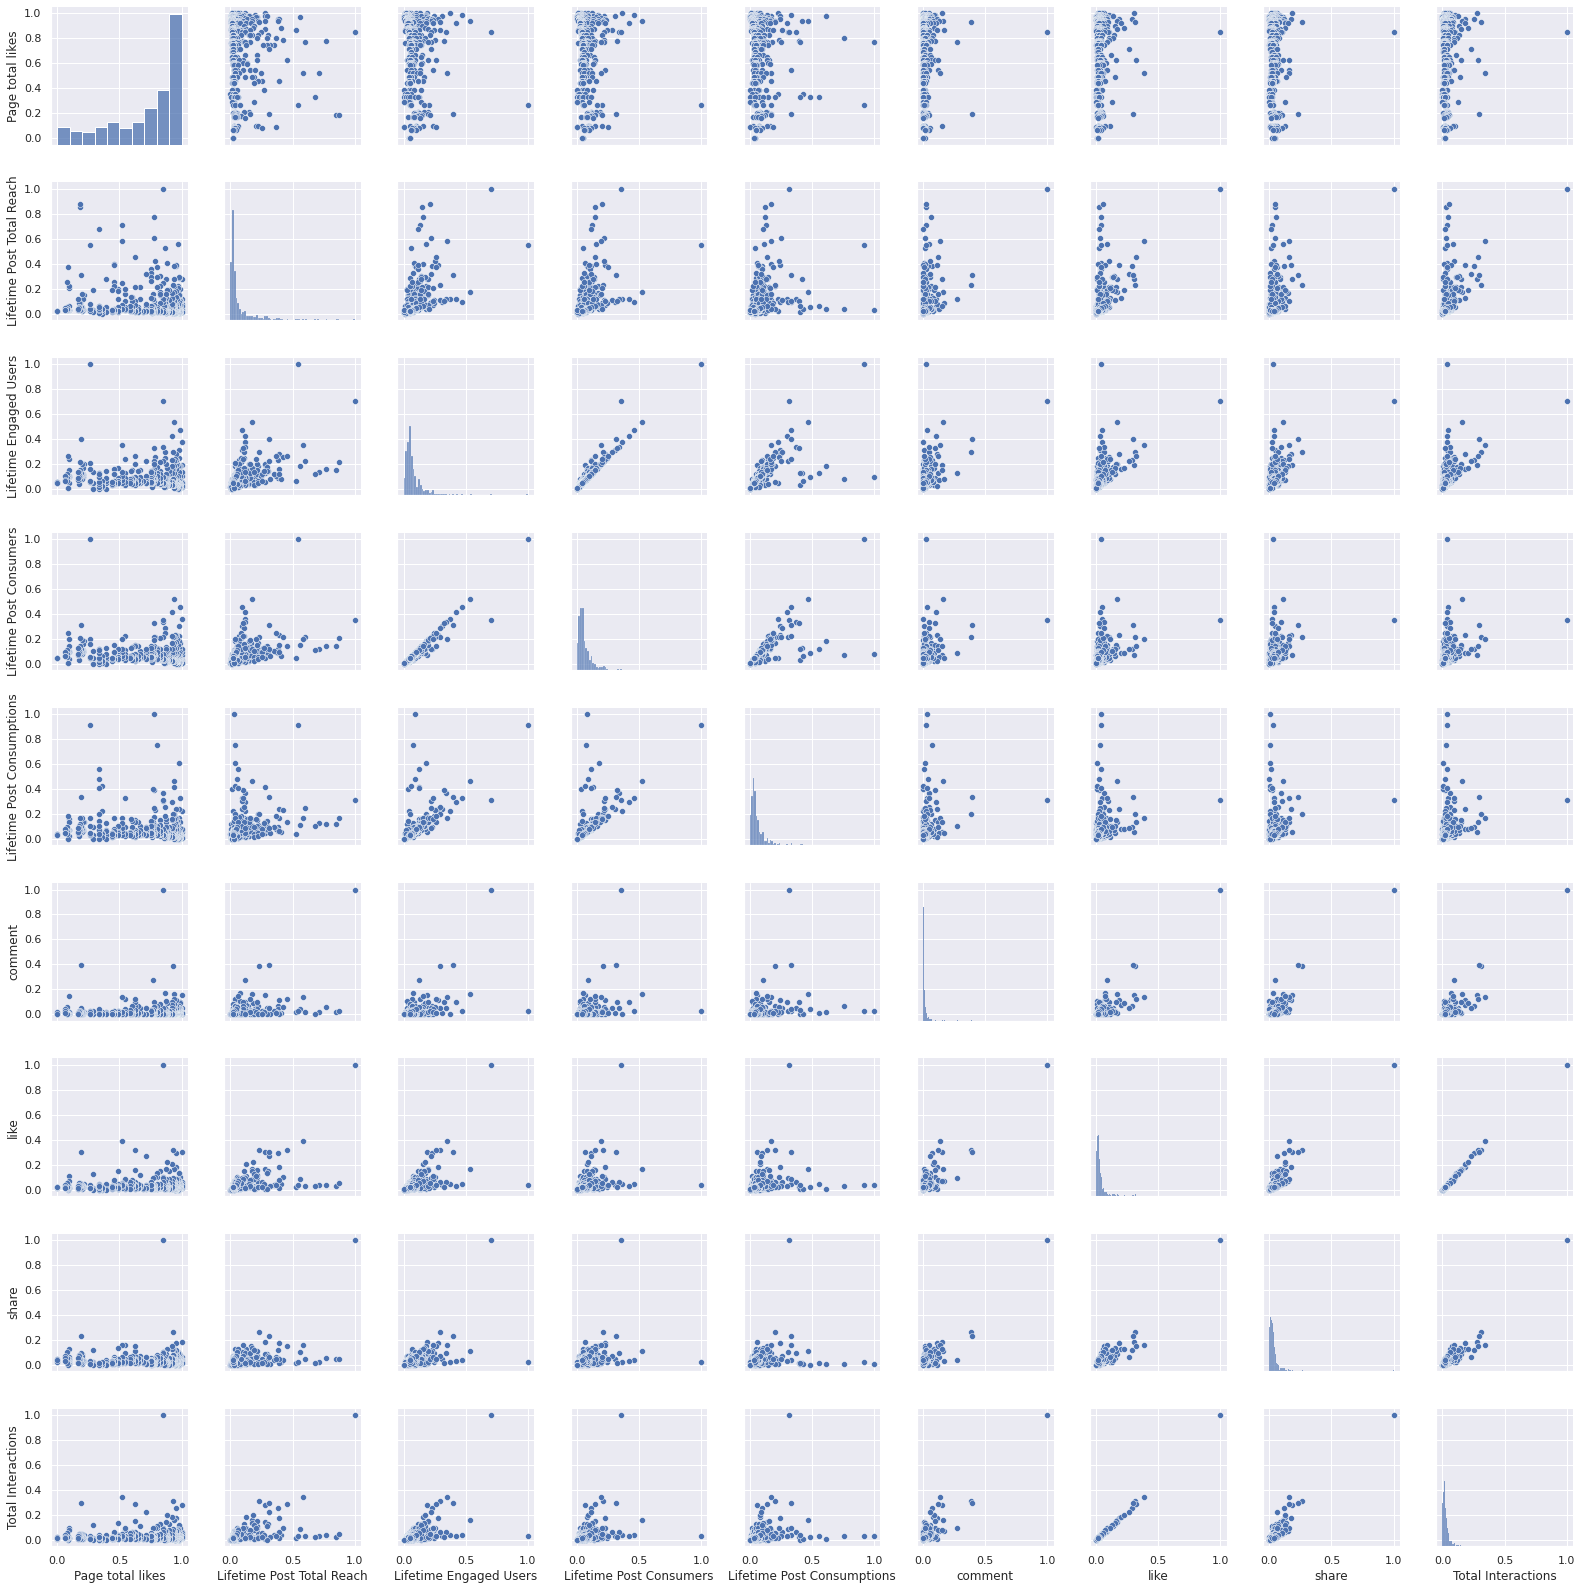

In [37]:
ax = plt.figure()
ax = sns.pairplot(df)

## **Covariance**

[Text(0.5, 1, 'Page total likes'),
 Text(1.5, 1, 'Lifetime Post Total Reach'),
 Text(2.5, 1, 'Lifetime Engaged Users'),
 Text(3.5, 1, 'Lifetime Post Consumers'),
 Text(4.5, 1, 'Lifetime Post Consumptions'),
 Text(5.5, 1, 'comment'),
 Text(6.5, 1, 'like'),
 Text(7.5, 1, 'share'),
 Text(8.5, 1, 'Total Interactions')]

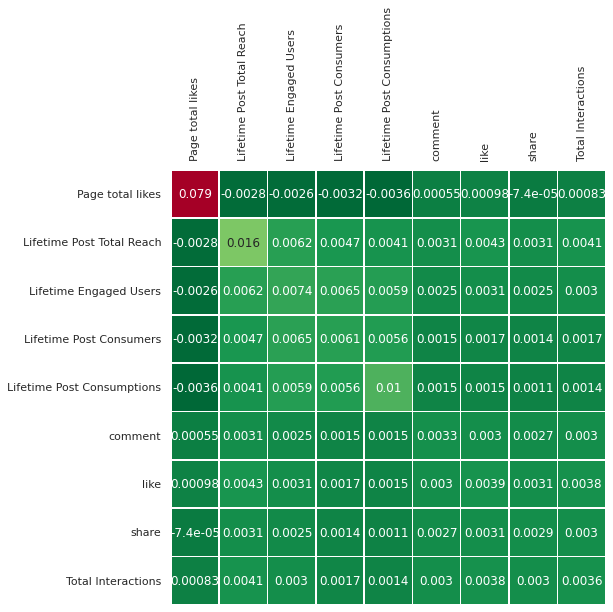

In [38]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

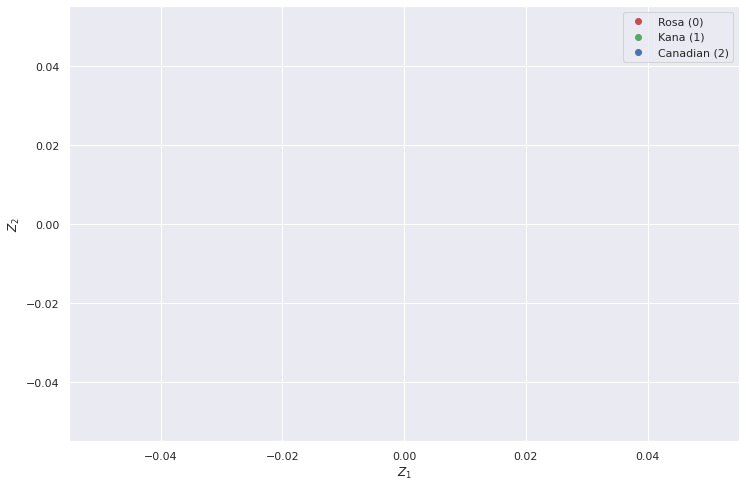

In [39]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(Y == 0)
idx_Kana = np.where(Y == 1)
idx_Canadian = np.where(Y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

Eigenvector matrix:
[[-9.93407245e-01  9.71713007e-02  4.82305615e-02 -3.46457399e-02
  -6.50863965e-03  5.08689852e-03 -1.02193228e-02  7.71442478e-04
   1.27585404e-17]
 [ 5.73935901e-02  5.77640765e-01 -4.54263661e-01 -6.63320090e-01
   1.14193188e-01  5.36170469e-02 -2.74194618e-02  4.62687862e-03
   2.15189931e-17]
 [ 5.10352608e-02  4.28545368e-01  2.44385975e-01  1.09702327e-01
  -4.87021178e-01 -9.16394564e-02  1.07263890e-01 -6.96342017e-01
  -5.98633091e-16]
 [ 5.61384983e-02  3.43294340e-01  3.50170054e-01 -9.54099944e-03
  -5.25941842e-01  1.20041817e-01 -6.19164240e-02  6.79285555e-01
   9.57704603e-16]
 [ 6.33410361e-02  3.66938140e-01  6.46949471e-01 -6.39812117e-03
   6.62306553e-01 -4.95308283e-02 -4.01964503e-02 -6.38222615e-03
   1.09067939e-17]
 [-9.26004266e-04  2.13907205e-01 -1.74529153e-01  3.80884280e-01
   1.35606607e-01  8.08250947e-01  3.23358440e-01 -2.10718072e-02
   4.52343164e-02]
 [-5.00514030e-03  2.62591869e-01 -2.48901506e-01  3.65372606e-01
   8.708

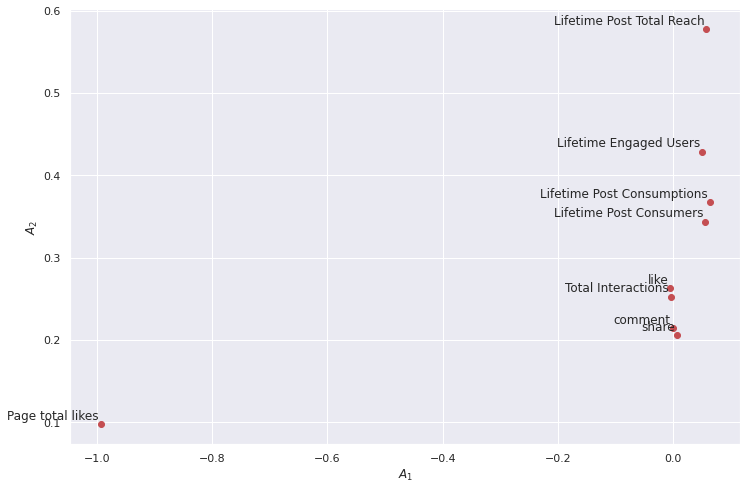

In [40]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


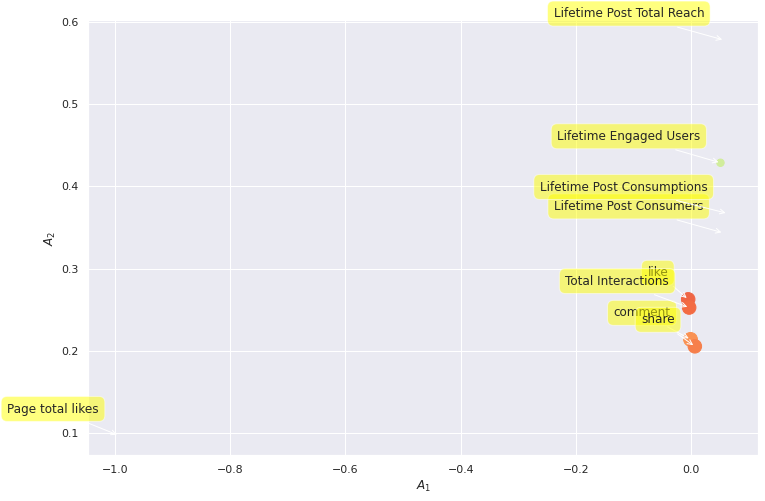

In [41]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

Eigenvalues:
[7.94611884e-02 3.15640842e-02 1.05268618e-02 6.81225600e-03
 3.00278803e-03 6.51974793e-04 2.91166426e-04 3.96495312e-06
 6.62598461e-35]


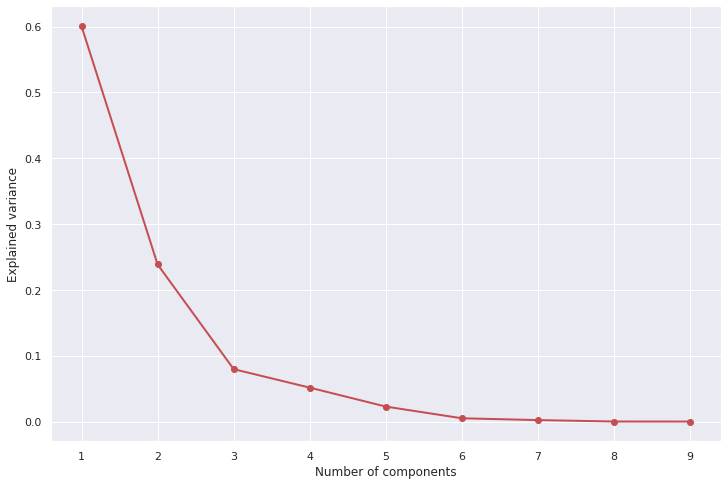

Explained variance per component:
[6.00548827e-01 2.38553866e-01 7.95595260e-02 5.14854162e-02
 2.26943602e-02 4.92747095e-03 2.20056683e-03 2.99661759e-05
 5.00776211e-34]


In [42]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')
#'Area', 'Perimeter', 'Comp', 'Length_kernel', 'Width', 'Asymmetry', 'Length_groove'

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

print(f'Explained variance per component:\n{(Lambda/sum(Lambda))}')

### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

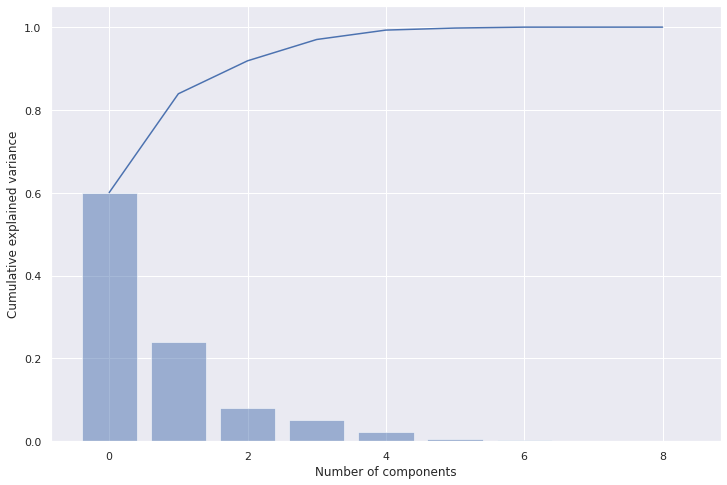

In [43]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### **Biplot**

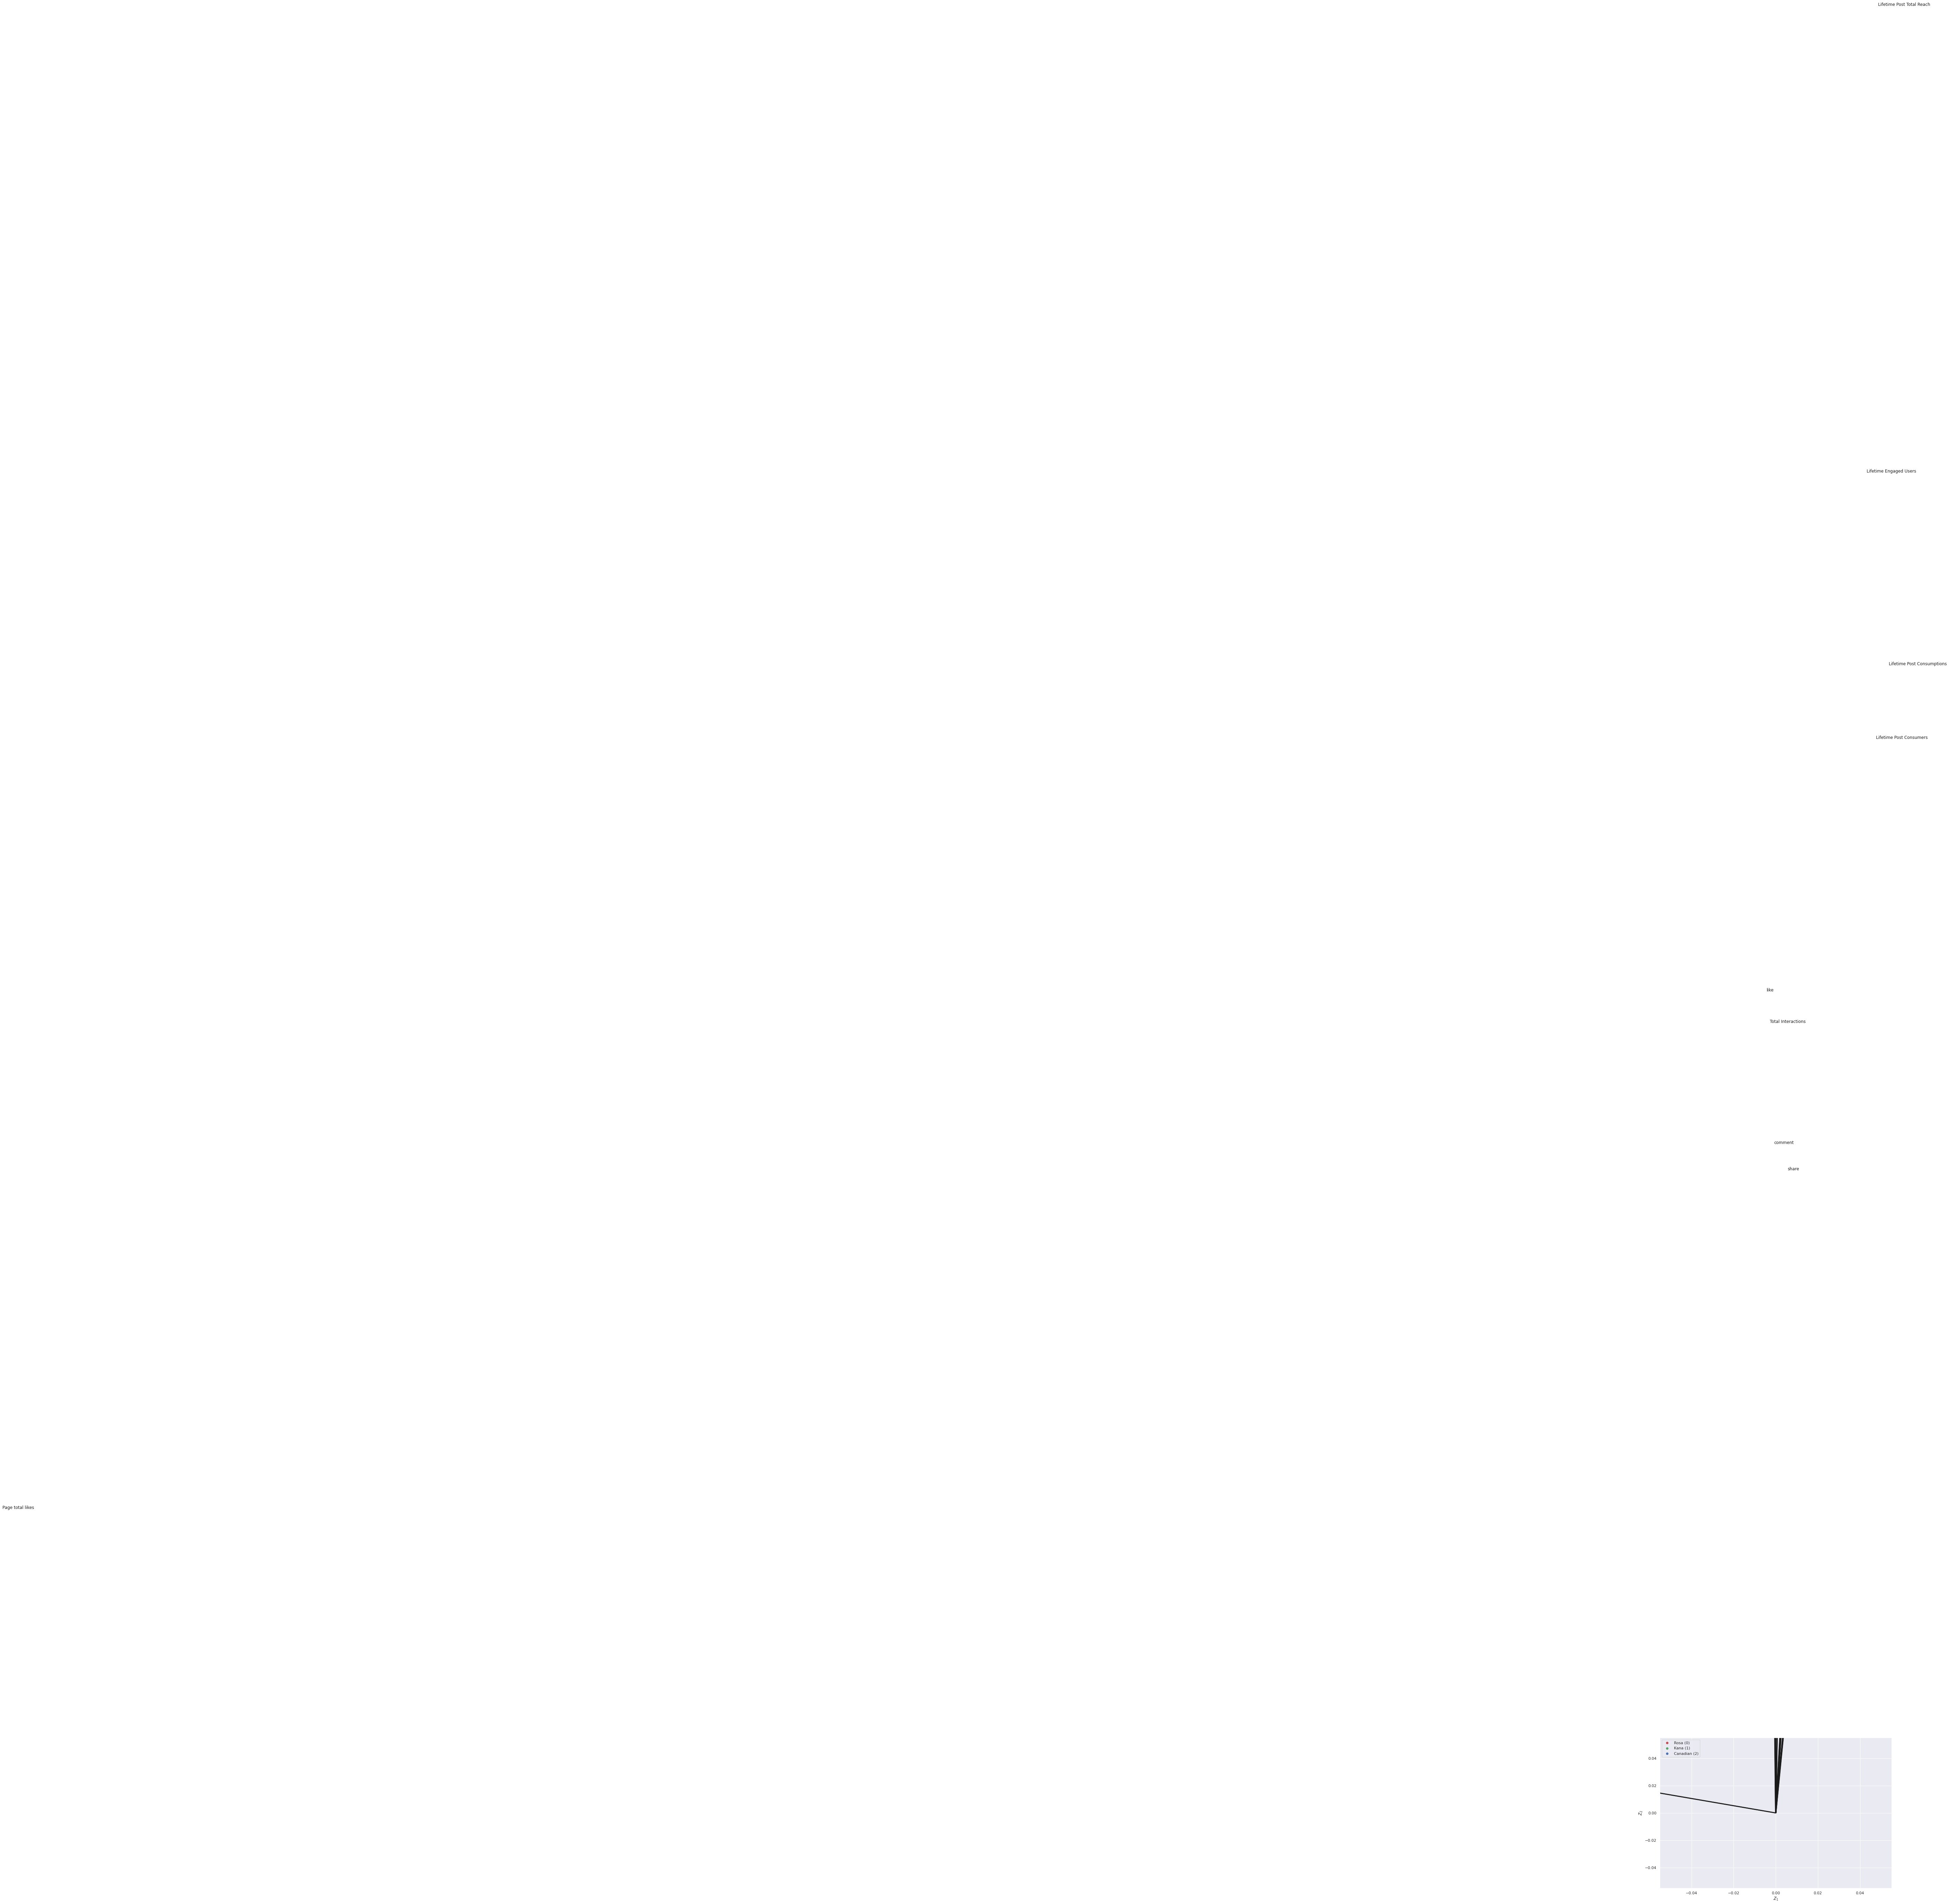

In [44]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

### **Principal components**

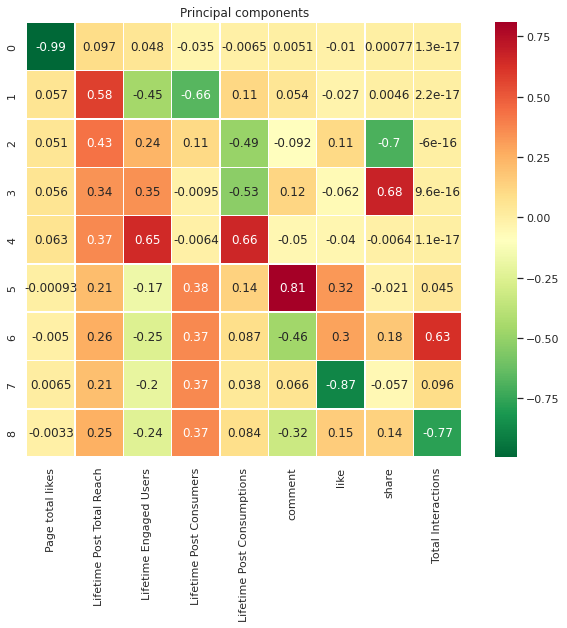

PC1:[-9.93407245e-01  5.73935901e-02  5.10352608e-02  5.61384983e-02
  6.33410361e-02 -9.26004266e-04 -5.00514030e-03  6.54526464e-03
 -3.32496056e-03]
PC2:[0.0971713  0.57764077 0.42854537 0.34329434 0.36693814 0.2139072
 0.26259187 0.20547755 0.25260908]


In [45]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

#'Area', 'Perimeter', 'Comp', 'Length_kernel', 'Width', 'Asymmetry', 'Length_groove'
print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

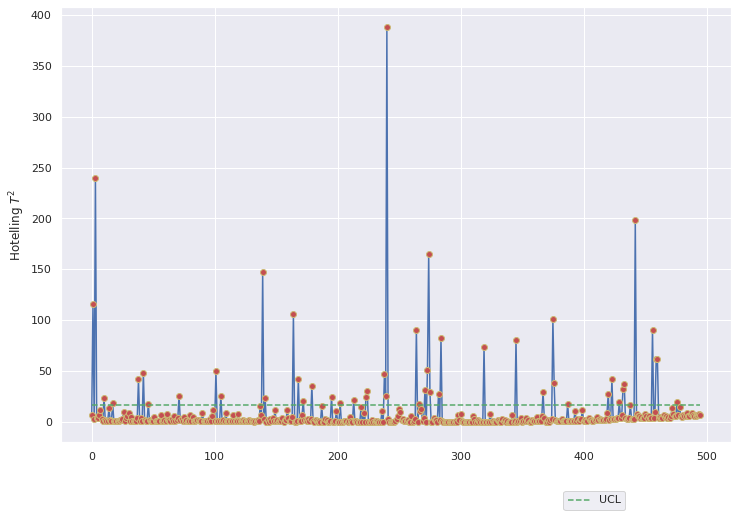

In [46]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [47]:
print(np.argwhere(Tsquare>UCL))

[[  1]
 [  3]
 [ 10]
 [ 17]
 [ 38]
 [ 42]
 [ 46]
 [ 71]
 [101]
 [105]
 [139]
 [141]
 [164]
 [168]
 [172]
 [179]
 [195]
 [202]
 [213]
 [223]
 [224]
 [238]
 [239]
 [240]
 [264]
 [266]
 [271]
 [273]
 [274]
 [275]
 [282]
 [284]
 [319]
 [345]
 [367]
 [375]
 [376]
 [387]
 [420]
 [423]
 [429]
 [432]
 [433]
 [438]
 [442]
 [456]
 [459]
 [460]
 [476]]


### **Control Charts for Principal Components**

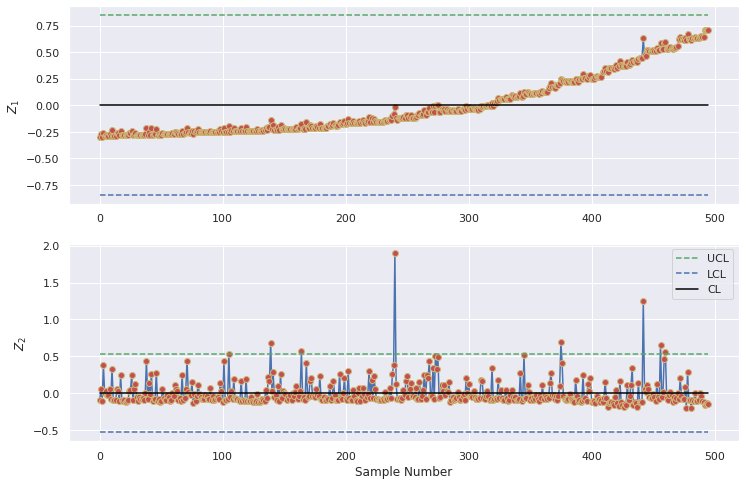

In [48]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [49]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[[139]
 [164]
 [240]
 [375]
 [442]
 [456]
 [460]]


## **Multi-Class Classification**

In [50]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, Y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 347
Test Dataset Size: 149


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

        Link      0.086     0.857     0.156         7
       Photo      0.953     0.492     0.649       124
      Status      0.846     0.846     0.846        13
       Video      0.000     0.000     0.000         5

    accuracy                          0.523       149
   macro avg      0.471     0.549     0.413       149
weighted avg      0.871     0.523     0.621       149



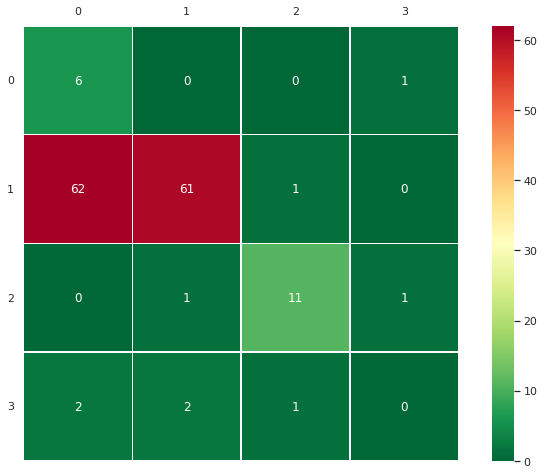

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

        Link      0.286     0.857     0.429         7
       Photo      0.941     0.895     0.917       124
      Status      0.800     0.615     0.696        13
       Video      0.000     0.000     0.000         5

    accuracy                          0.839       149
   macro avg      0.507     0.592     0.510       149
weighted avg      0.866     0.839     0.844       149



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


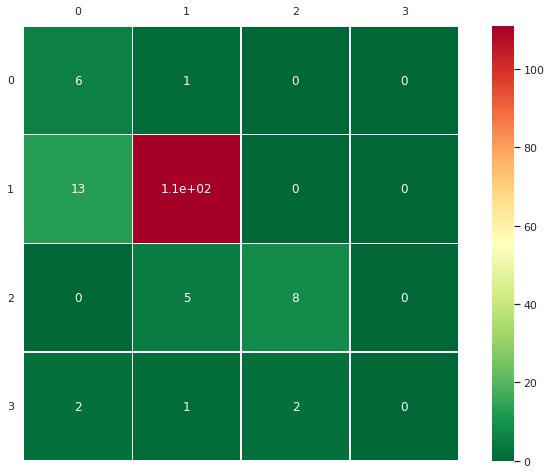

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

        Link      0.000     0.000     0.000         7
       Photo      0.837     0.992     0.908       124
      Status      0.000     0.000     0.000        13
       Video      0.000     0.000     0.000         5

    accuracy                          0.826       149
   macro avg      0.209     0.248     0.227       149
weighted avg      0.696     0.826     0.755       149



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


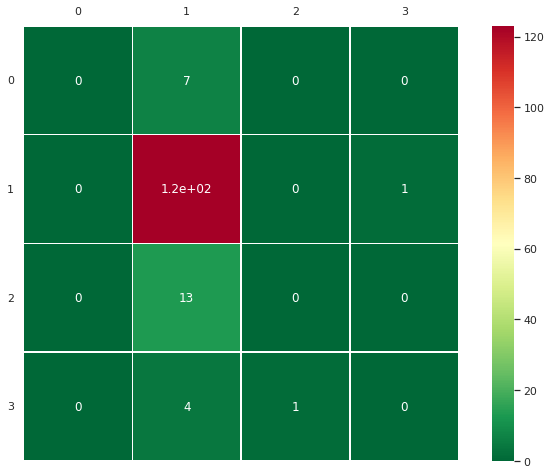

ValueError: ignored

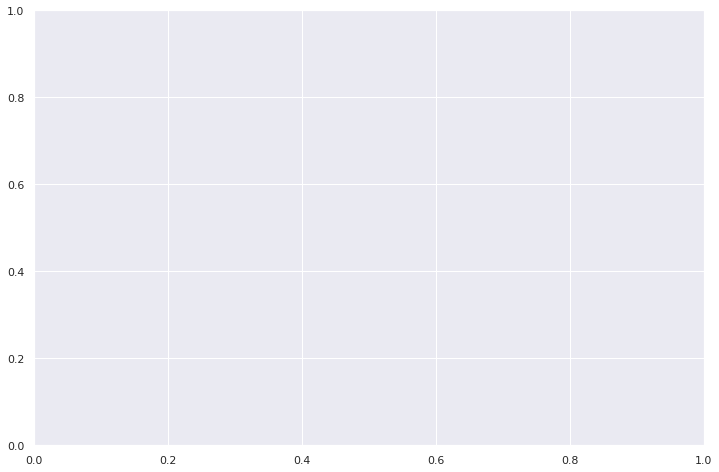

In [51]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

In [ ]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

In [ ]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

In [ ]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

In [ ]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()